In [1]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/Dữ liệu/BK_20_Test_3_clean.csv")
print(f"Kích thước dữ liệu: {df.shape}")
display(df.head())

Kích thước dữ liệu: (1693, 19)


,Date,Buffer pressure min,Buffer pressure max,Annulus pressure min,Annulus pressure max,Flow pressure min,Flow pressure max,T min,T max,Qliq,Qoil,Water cut,Qgas,Choke,Gas factor,Gas injection rate,Downtime,Potential oil production,Potential liquid production
0,2020-10-03,32.2,45.8,83.2,83.9,15.0,18.7,21,33,90.999984,54.777778,39.8,20679,10,466,14.96,0.00,44.37,91.0
1,2020-10-06,15.1,41.2,77.9,82.0,15.0,20.5,33,55,100.479152,55.154706,45.1,31831,22,675,0.42,1.25,47.14,106.0
2,2020-10-24,47.7,52.4,89.5,91.2,14.7,17.2,39,42,170.599992,106.049383,37.8,70170,14,817,12.00,0.00,85.95,170.6
3,2020-10-25,48.6,51.6,90.3,91.0,14.8,17.1,40,42,161.899992,104.493827,35.5,73737,14,871,12.00,0.00,84.58,161.9
4,2020-10-26,50.2,51.6,88.7,91.1,14.7,16.9,41,43,156.199992,104.691358,33.0,73296,14,864,10.27,0.00,84.77,156.2


In [2]:
if 'Oildensity' in df.columns:
    df = df.drop(columns=['Oildensity'])
    print("Đã xóa cột 'Oildensity'.")
else:
    print("Không tìm thấy cột 'Oildensity' để xóa.")

Không tìm thấy cột 'Oildensity' để xóa.


In [3]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

In [4]:
corr_matrix = df[num_cols].corr(method="pearson")

In [5]:
display(corr_matrix)

,Buffer pressure min,Buffer pressure max,Annulus pressure min,Annulus pressure max,Flow pressure min,Flow pressure max,T min,T max,Qliq,Qoil,Water cut,Qgas,Choke,Gas factor,Gas injection rate,Downtime,Potential oil production,Potential liquid production
Buffer pressure min,1.000000,0.895936,0.694636,0.225880,-0.335271,-0.118377,-0.600643,-0.749071,0.051941,0.736200,-0.792618,0.845310,-0.517288,-0.002239,0.004659,-0.022129,0.732968,0.054556
Buffer pressure max,0.895936,1.000000,0.665028,0.222005,-0.429857,-0.070275,-0.752547,-0.724882,0.022671,0.759867,-0.833021,0.849504,-0.592800,0.018790,-0.095363,0.037449,0.767748,0.035840
Annulus pressure min,0.694636,0.665028,1.000000,0.248888,-0.194050,0.045571,-0.444605,-0.601952,0.305470,0.691199,-0.618350,0.637652,-0.289611,-0.046113,0.195867,-0.046020,0.687613,0.303297
Annulus pressure max,0.225880,0.222005,0.248888,1.000000,-0.062471,-0.007055,-0.169386,-0.212719,0.071148,0.209409,-0.195071,0.200883,-0.118343,-0.014380,0.039773,-0.004056,0.208499,0.072189
Flow pressure min,-0.335271,-0.429857,-0.194050,-0.062471,1.000000,0.530740,0.429491,0.400836,0.125025,-0.487447,0.594709,-0.389214,0.771051,-0.016177,0.604270,-0.073634,-0.489746,0.109383
Flow pressure max,-0.118377,-0.070275,0.045571,-0.007055,0.530740,1.000000,0.116921,0.174285,0.121853,-0.200718,0.276650,-0.124899,0.474643,-0.009910,0.462306,-0.012681,-0.191897,0.124316
T min,-0.600643,-0.752547,-0.444605,-0.169386,0.429491,0.116921,1.000000,0.734153,0.169558,-0.525409,0.633091,-0.552391,0.576749,-0.004434,0.149015,-0.219085,-0.542211,0.133584
T max,-0.749071,-0.724882,-0.601952,-0.212719,0.400836,0.174285,0.734153,1.000000,0.123105,-0.591102,0.673196,-0.559227,0.635178,0.014668,0.110427,0.085182,-0.585176,0.128897
Qliq,0.051941,0.022671,0.305470,0.071148,0.125025,0.121853,0.169558,0.123105,1.000000,0.419278,-0.031930,0.166476,0.268896,-0.018776,0.416022,-0.147097,0.380994,0.936927
Qoil,0.736200,0.759867,0.691199,0.209409,-0.487447,-0.200718,-0.525409,-0.591102,0.419278,1.000000,-0.892786,0.740363,-0.593163,-0.025534,-0.205534,-0.030765,0.971003,0.415305


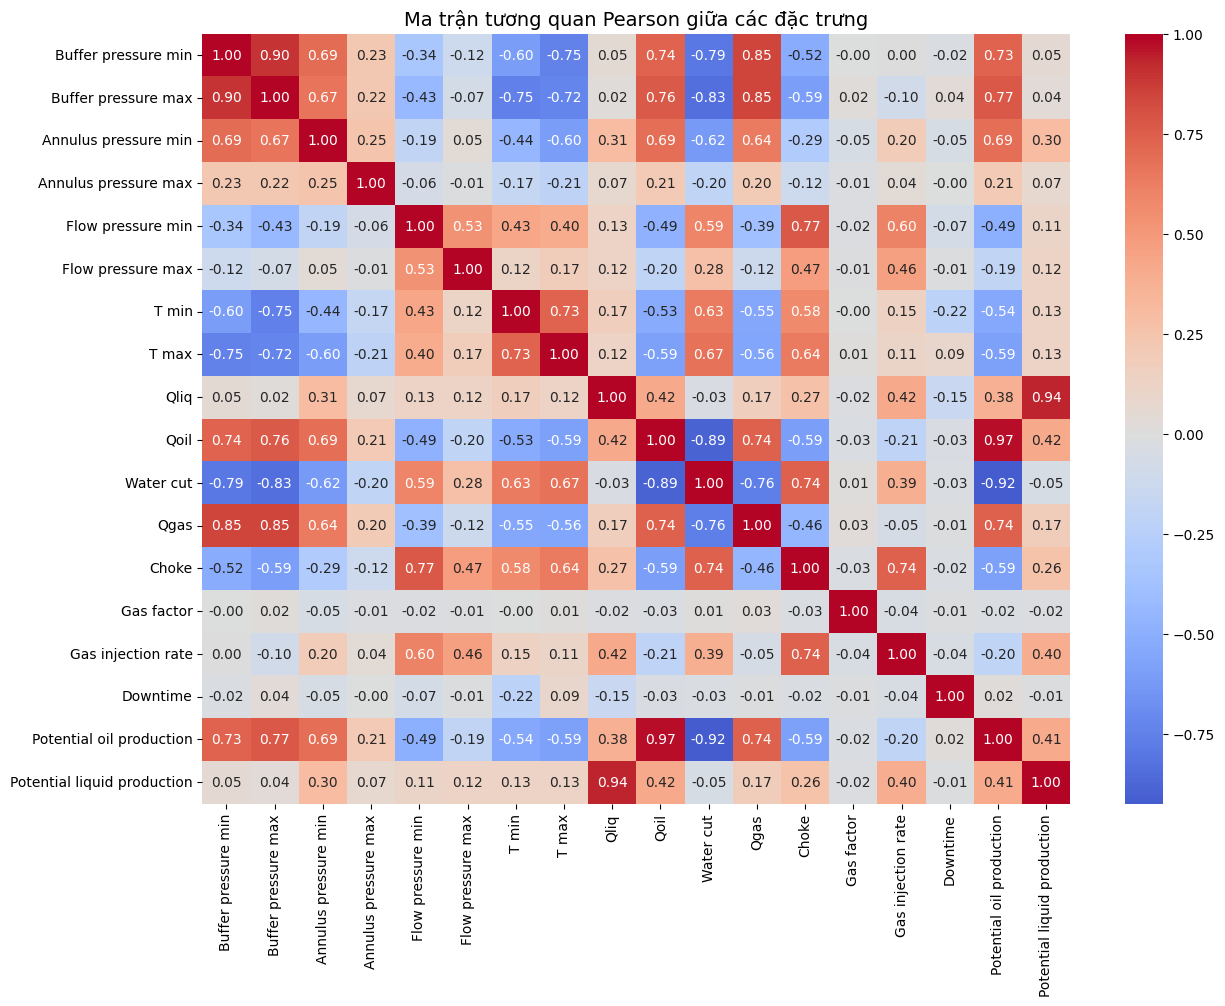

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Ma trận tương quan Pearson giữa các đặc trưng", fontsize=14)
plt.show()